In [39]:
import pandas as pd
import json
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

Import all the necessary items needed


In [7]:
df = pd.read_json('winemag-data-130k-v2.json')
df=df.fillna(0)
df.head()

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,0.0,Vulkà Bianco,White Blend,Etna,0,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,0,0,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,0,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,0,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,0,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks


Import the json file in and replace all NaN values with 0

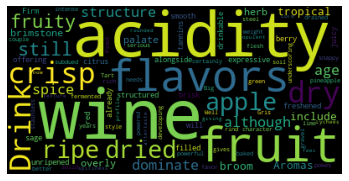

In [16]:
texts = df['description'].values 
wordcloud1 = WordCloud().generate(str(texts))
# Generate plot
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

Create a word cloud of the descriptions of all the wines overall. Use matlab to plot the word cloud so we can see most used words

In [23]:
print(df['price'].mean())
print(df['points'].mean())

32.915696578467504
88.44713820775404


Find the average price of all the wines and satisfaction

Text(0, 0.5, 'Frequency')

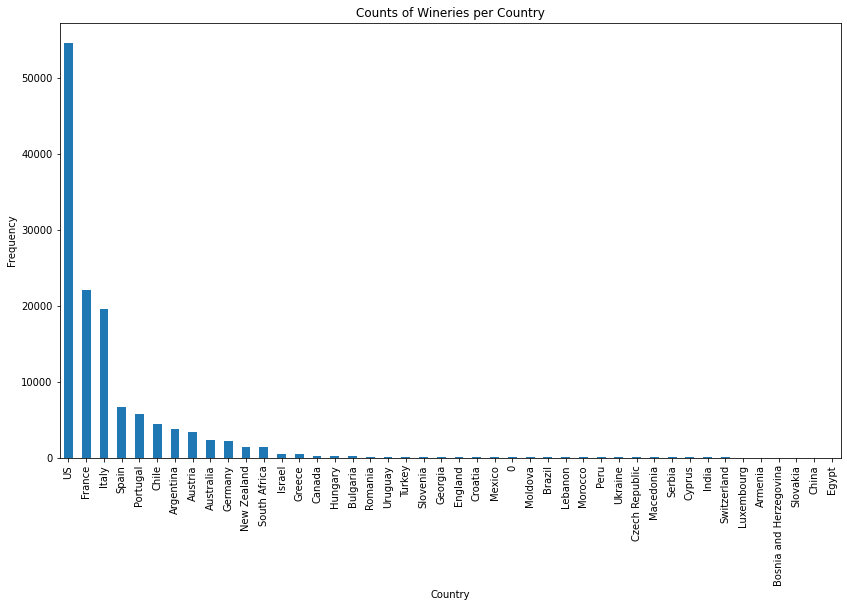

In [26]:
ax = df['country'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Counts of Wineries per Country")
ax.set_xlabel("Country")
ax.set_ylabel("Frequency")

Graph the frequency of wineries visited in each country 

In [40]:
df_means = df.groupby('country').description.agg([len]).sort_values(by='len', ascending=False)
df_means['mean points'] =  df.groupby(['country']).points.mean().sort_values(ascending = False)
df_means.head()


,len,mean points
country,,
US,54504,88.563720
France,22093,88.845109
Italy,19540,88.562231
Spain,6645,87.288337
Portugal,5691,88.250220


Find the average satisfaction between each country. We grouped by the country names and then sorted in descending order on the number of reviews for each country. 

In [41]:
df_means = df.groupby('country').description.agg([len]).sort_values(by='len', ascending=False)
df_means['mean price'] =  df.groupby(['country']).price.mean().sort_values(ascending = False)
df_means.head()

,len,mean price
country,,
US,54504,36.413089
France,22093,33.100484
Italy,19540,34.333316
Spain,6645,27.909556
Portugal,5691,22.458970


Find the average price between each country. We grouped by the country names and then sorted in descending order on the number of reviews for each country.

In [42]:
df.corr(method ='pearson')

,points,price
points,1.000000,0.385438
price,0.385438,1.000000


In [43]:
df.corr(method ='kendall')

,points,price
points,1.00000,0.38511
price,0.38511,1.00000


Using the pearson and Kendall method to see the correlation between points and price